<div class="jumbotron jumbotron-fluid">
  <div class="container">
    <h1 class="display-4">Load text files from a directory</h1>
    <p class="lead">Example on how to load the full text from Text files stored in a certain local directory (and sub-directories) of from a file downloaded from a URL.</p>
  </div>
</div>

### In this Notebook:

 * Read Text files: from local zip file or downloaded from a URL;
 * Loaded the contents of the several Text files into a List;
 * Build a Word Cloud from it -- see the outputs properly on [NBViewer](https://nbviewer.jupyter.org/github/BL-Labs/Jupyter-notebooks-projects-using-BL-Sources/blob/master/DataBL/CMTaylorKeyloggingData/DataBL_CMTaylorKeyloggingData_read_text_files.ipynb)
 

    
#### Notes:

    * If using BINDER or a did a git clone to your Jupyter Notebook LOCAL SERVER, if you want to clean the output from the previous run, from the main menu, choose "Kernel" > "Restart and Clear Output"; if using Google Colab, please open instead the mactching "not_run" notebook;
    * If using BINDER or a did a git clone to your Jupyter Notebook LOCAL SERVER, skip cell 1, place the cursor on cell 2 and from the main menu, choose "Cell" > "Run All Bellow", if not executing cell-by-cell;
    * If using Google Colab, with the cursor on the first cell, from the main menu, choose "Runtime" > "Run after", if not executing cell-by-cell.



In [1]:
# Load the necessary modules / Libraries:

import os, json
import pandas as pd

### Let's check the files in this Directory:

In [2]:
# If all the files are under the same directory a simpler way to locate them would be:
# path_to_json = 'data/dig19cbooksjsontext/json/0037/'
# json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

#this will locate all the JSON files inside the main Directory and any sub-Folder:
path_to_files = 'data/03_CTC1_October_2014-4February2015/CTC1_bckp10_keystroke_item_files/txt/'

txt_files = [os.path.join(root, name)
             for root, dirs, files in os.walk(path_to_files)
             for name in files
             if name.endswith((".txt"))] #If we needed to read several files extensions: if name.endswith((".ext1", ".ext2"))

print('Number of TXT files ready to be loaded: ' + str(len(txt_files)))


Number of TXT files ready to be loaded: 10


In [3]:
print('Path to the first file: '+txt_files[0])
print('Path to the last file: '+txt_files[len(txt_files)-1])

Path to the first file: data/03_CTC1_October_2014-4February2015/CTC1_bckp10_keystroke_item_files/txt/CTC1 bckp10 keystroke item rtf files016.txt
Path to the last file: data/03_CTC1_October_2014-4February2015/CTC1_bckp10_keystroke_item_files/txt/CTC1 bckp10 keystroke item rtf files006.txt


### Files are ready to be loaded into a list of documents

In [5]:
list_of_documents=[]
count_delete = 0
    
import re

for i in range (len(txt_files)):
    f = open(txt_files[i], "r")
    raw = f.read()
    # append the text only, excluding all the recorded commands (that are limited by "<" and ">", e.g. "<DELETE:5>", "<CTRL+S>")
    list_of_documents.append(re.sub(r'<.+?>', '', raw))    

In [10]:
#Exclude Stop_Words:

STOP_WORDS = frozenset([
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "said","you", "your", "yours", "yourself",
    "yourselves", "odt", "openoffice.org","openoffice","soffice","org","writer","ntitle","nttart", "keystrokes", "typed","writer]","napplication"])

In [6]:
# ONLY run this the first 
# !pip install wordcloud

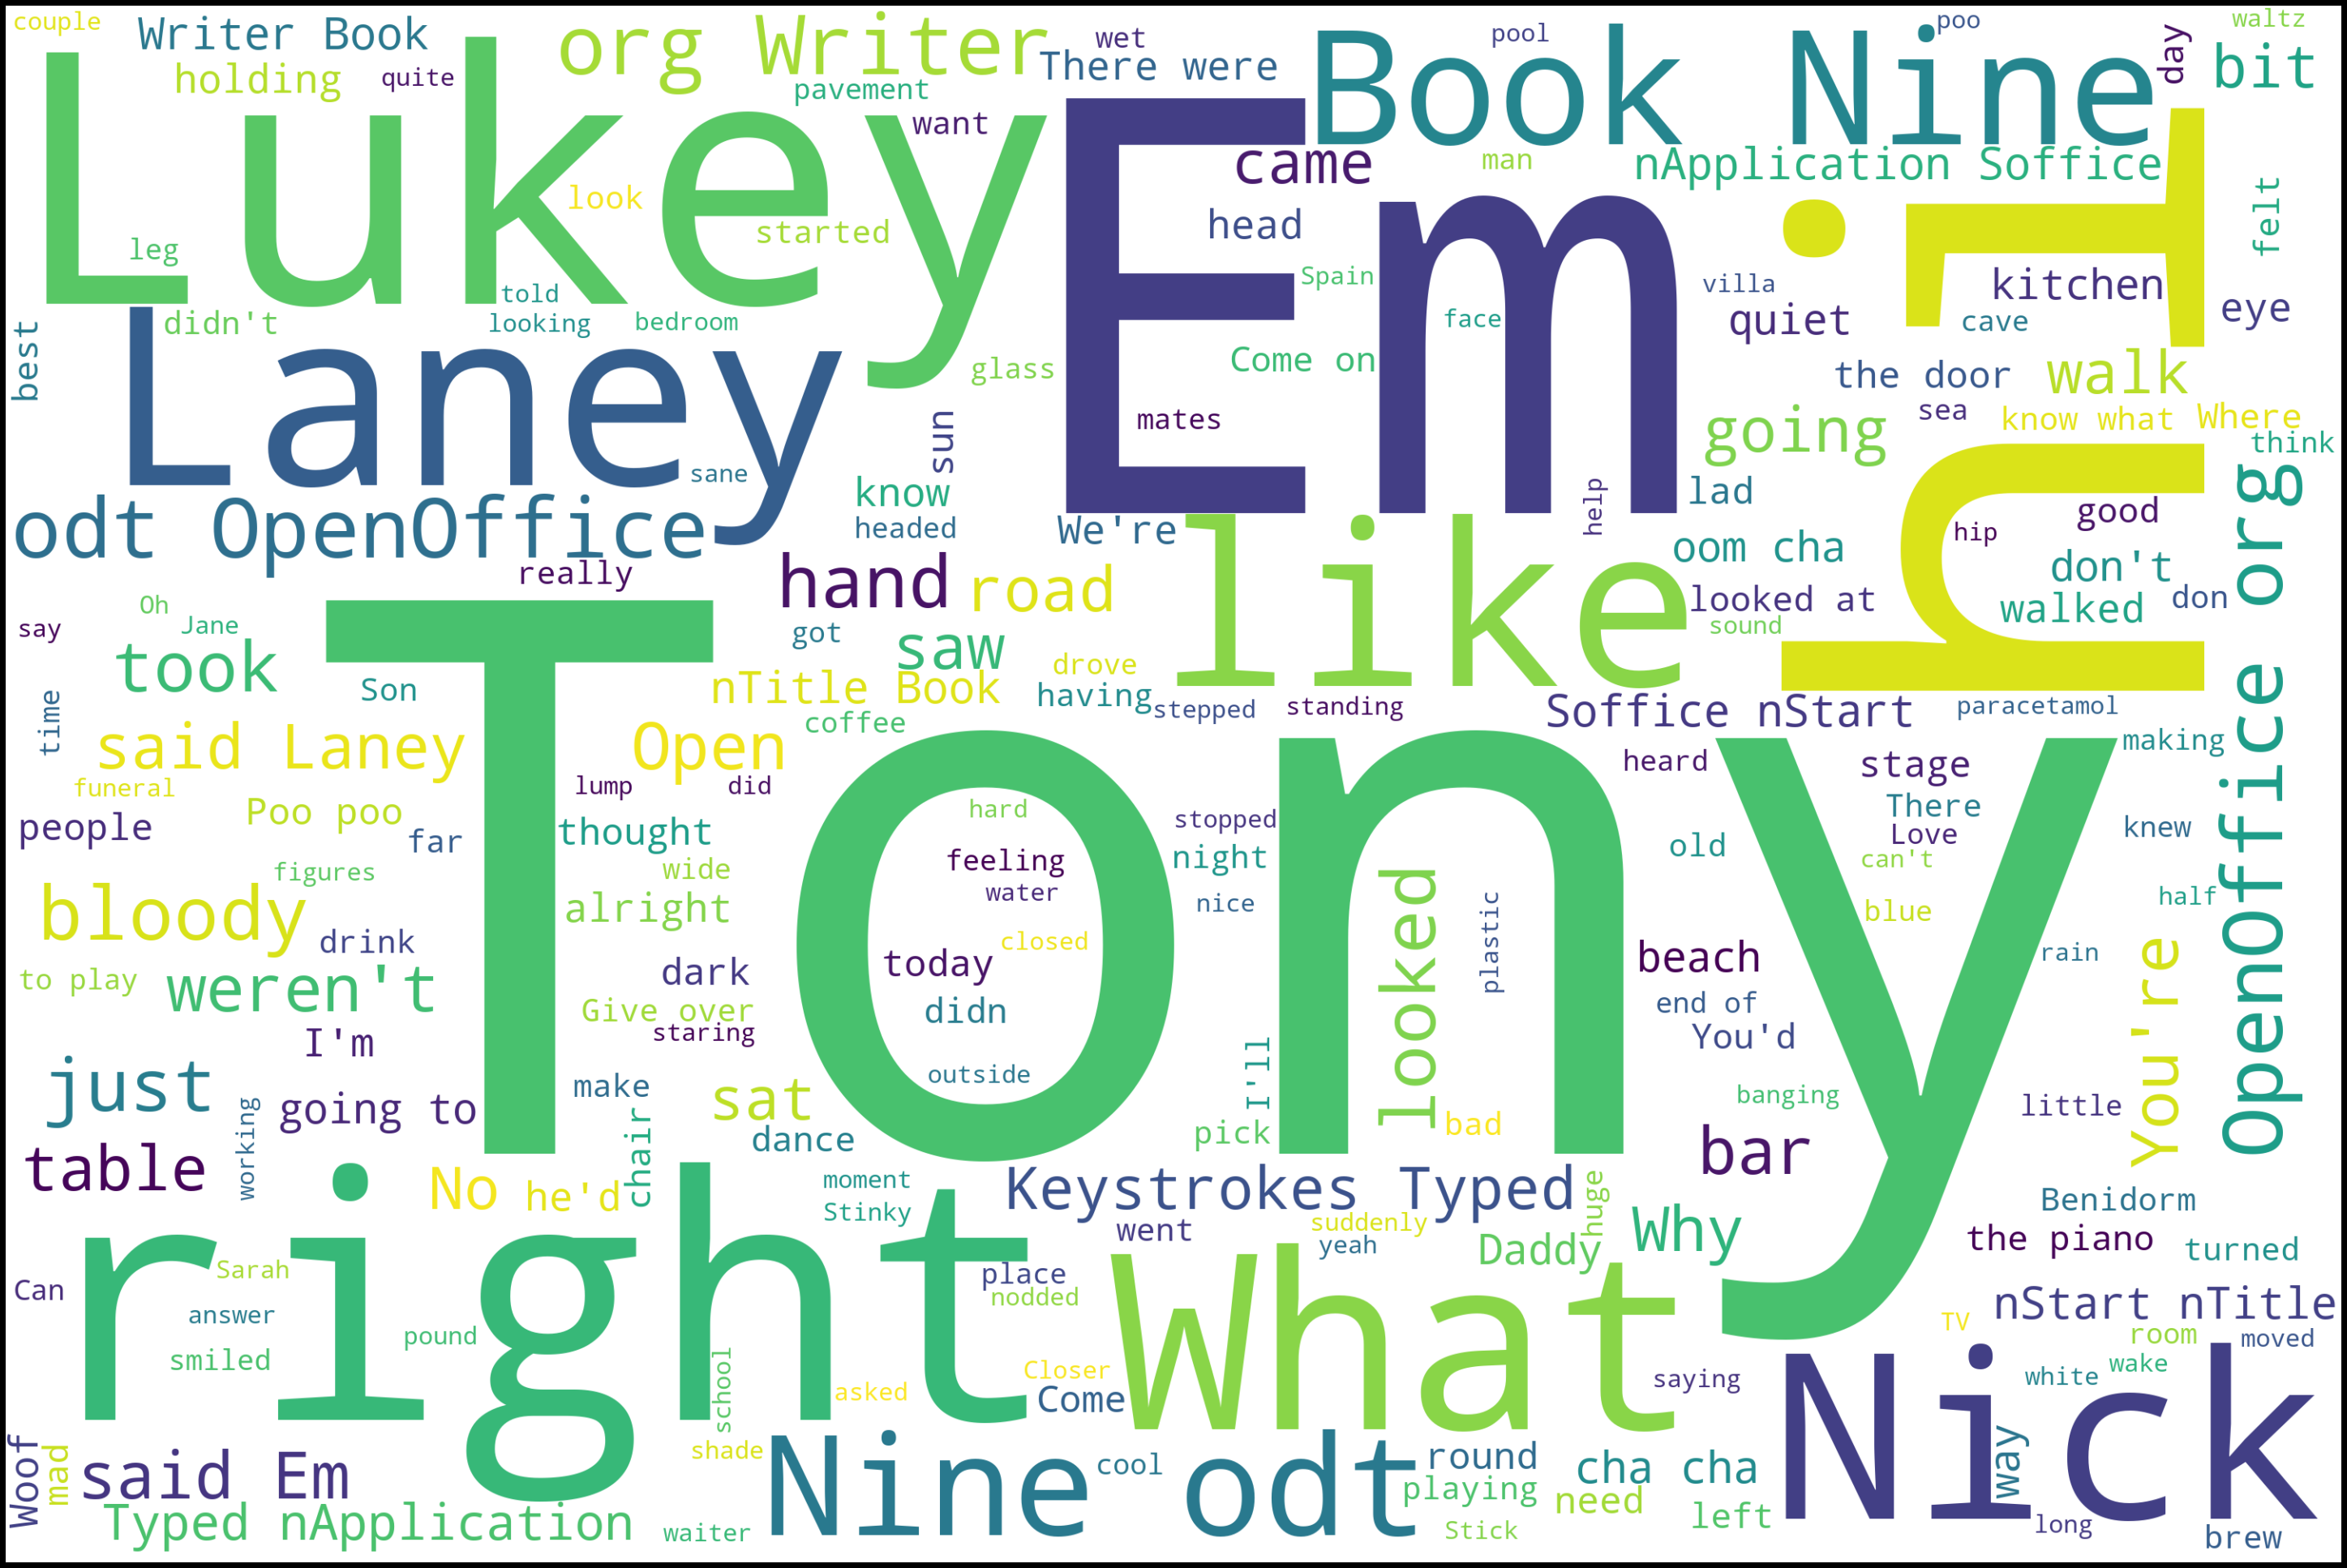

In [14]:
#from wordcloud import WordCloud, STOPWORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOP_WORDS).generate(str(list_of_documents))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Using a simpler one, without stop words:

In [12]:
# Generate a Word Cloud of the top 20 Places of Publication

# !pip install git+https://git@github.com/kavgan/word_cloud.git

from word_cloud.word_cloud_generator import WordCloud
from IPython.core.display import HTML

wc=WordCloud()
embed_code=wc.get_embed_code(text=list_of_documents,random_color=True,topn=100)
HTML(embed_code)

#### ... and with stop words

In [13]:
# initialize WordCloud
wc=WordCloud(stopwords=STOP_WORDS)
embed_code=wc.get_embed_code(text=list_of_documents,random_color=True,topn=100)
HTML(embed_code)